# 'geopandas'

GeoPanda is a Python library that extends `pandas` by adding support for geospatial data.

## Reproducible file paths

Let's import the packages wwe'll be working with:


In [2]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
# create a file path that could work with mac ie.: backslash
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

We can use this file path to import the shapefile using the `geopandas.read_file()` function

In [11]:
pigs = gpd.read_file(fp)
pigs

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


## Check-in 
create filepath for boundary and load data

In [12]:
fp = os.path.join('data','ca_state_boundary','ca_state_boundary.shp')
ca_boundary = gpd.read_file(fp)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## GeoSeries and GeoDataFrames

`gpd.GeoDataFrame`=`pandas.DataFrame` + geometry column
geometry column = `gpd.GeoSeries` it holds the geometry (point, polygon, etc) of each spatial feature.
The other columns in the GeoDataFrame are our usual `pandas.Series`

Example

Notice the `geometry` 

In [13]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [14]:
# Chekc what kind of obkect is pigs
print(type(pigs))

# Check what kind of object is the geometry column
print(type(pigs.geometry))

# Check what kind of object is the species column
print(type(pigs.species))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


the data type of the geometry column is also reflected when we loo at the data types of the values in each column\

In [15]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [16]:
# Check the geometry type of each element in the geometry column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

In [18]:
# Check-in
# what is the geometry type of the single feature in the ca state boundary? and why does it make sense to have this kind of geometry?
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS and extent 

CRS = coordinate reference system and it is one of the basic information pieces for geospatial data

We can think of the CRS as istructions to locate each spatial feature of our data frame on the surface of the earth. 

In [19]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
# Get more info about the CRS
print('ellipsoid:', pigs.crs.ellipsoid)
print('datum:', pigs.crs.datum)
print('is geographic?', pigs.crs.is_geographic)
print('is projected?', pigs.crs.is_projected)

ellipsoid: WGS 84
datum: World Geodetic System 1984 ensemble
is geographic? True
is projected? False


- what are the ellipsoid and datum? what are they telling us about the CRS?
Ellipsoid is an abstract shape of earth. datum is how we align our ellipsoid to match the earth's surface.
- What does it mean that the CRS is geographic and not projected?
geographic means you are considering earth in angles, projection is transforming these angles into maps

The **extent** of the geo-dataframe is the bounding bnox covering **all** the spatial features in our geo-dataframe.

This is formed by finding the points that arefurthest west, east, south and north. 

In [21]:
# obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Check-in

Print the CRS and extent for the CA boundary.
Are both geo-dataframes in the same CRS?

In [24]:
print('CRS:', ca_boundary.crs)
ca_boundary.total_bounds

CRS: epsg:4326


array([-124.48201686,   32.52883674, -114.13122248,   42.00950827])

In [25]:
pigs.crs == ca_boundary.crs

True

## Data Wrangling

Since 'geopandas' is built on top of `pandas`, we may use everything we have learned about data selection, wrangling, and modification for `pandas.DataFrames` to wrangle geo-dataframes.

Example:

We only want to use recent data for wild pig observations. 

In [27]:
# Examine pig obs by year
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [28]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# Check the length of original dataframe
print('Total number of obseravtions', len(pigs))

# Check length of the new dataframe
print('Number of observation since 2020:', len(pigs_recent))

Total number of obseravtions 1046
Number of observation since 2020: 606


## Create a map

geodataframe also have a `plot()` method that we can call directly to plot the data quickly. 

Example: 

<AxesSubplot:>

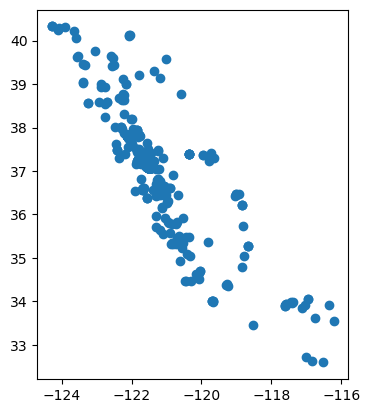

In [31]:
pigs_recent.plot()

## `matplotlib`'s `fig` and `ax`

Matplotlib graphs the data in a **figure** which can have one or more **axes**.

The **axes** are only the area specified by a pair of x,y axes and what is plotted in it. 
The *figure* may have multiple axes

To create a blank figure:

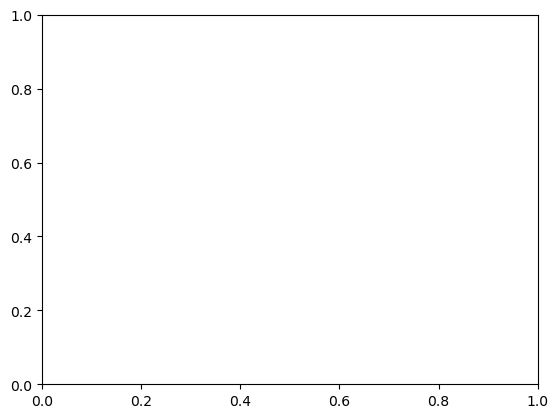

In [32]:
# initialize an empty figure (fig) and axes (ax)
fig, ax = plt.subplots()

# Display the figure
plt.show()

# Add a layer

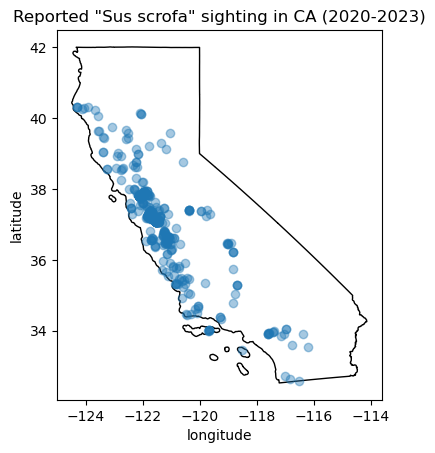

In [38]:
# initialize an empty figure (fig) and axes (ax)
fig,ax = plt.subplots()
# add CA boundary
ca_boundary.plot(ax=ax,
                color='none',
                edgecolor= 'black')
# plot a df on the ax axis
pigs_recent.plot(ax=ax,
                alpha=0.4) 

# Customization
ax.set_title('Reported "Sus scrofa" sighting in CA (2020-2023)')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
# display the figrue
plt.show()